## Импорт библиотек

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report


## Загрузка данных

Беременность,	
Глюкоза,
кровяное давление,
Толщина кожи,
Инсулин,
Индекс массы тела,	
Наследственная функция при диабете,
Возраст,
Исход.

In [2]:
df  = pd.read_csv('diabetes-dataset.csv',  sep=',')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (2000, 9)
Пропущенные значения:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## EDA

In [4]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000000,3.703500,3.306063,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,2000.000000,121.182500,32.068636,0.000000,99.000000,117.000000,141.000000,199.000000
BloodPressure,2000.000000,69.145500,19.188315,0.000000,63.500000,72.000000,80.000000,122.000000
SkinThickness,2000.000000,20.935000,16.103243,0.000000,0.000000,23.000000,32.000000,110.000000
Insulin,2000.000000,80.254000,111.180534,0.000000,0.000000,40.000000,130.000000,744.000000
BMI,2000.000000,32.193000,8.149901,0.000000,27.375000,32.300000,36.800000,80.600000
DiabetesPedigreeFunction,2000.000000,0.470930,0.323553,0.078000,0.244000,0.376000,0.624000,2.420000
Age,2000.000000,33.090500,11.786423,21.000000,24.000000,29.000000,40.000000,81.000000
Outcome,2000.000000,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.000000


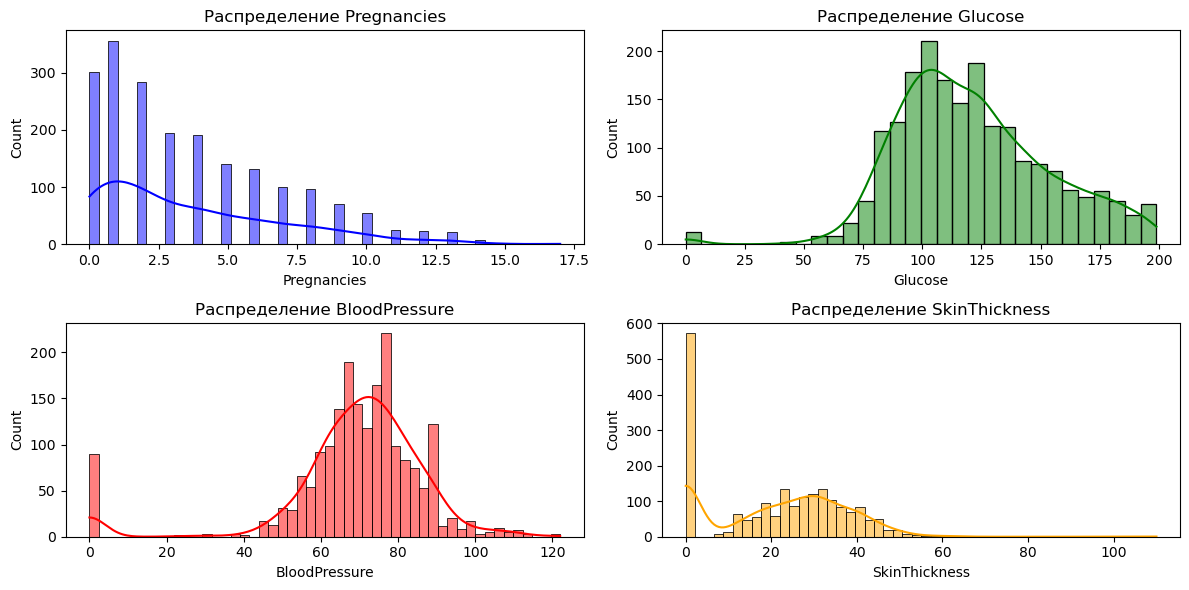

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Pregnancies'], bins=50, kde=True, color='blue')
plt.title('Распределение Pregnancies')

plt.subplot(2, 2, 2)
sns.histplot(df['Glucose'], bins=30, kde=True, color='green')
plt.title('Распределение Glucose')

plt.subplot(2, 2, 3)
sns.histplot(df['BloodPressure'], bins=50, kde=True, color='red')
plt.title('Распределение BloodPressure')

plt.subplot(2, 2, 4)
sns.histplot(df['SkinThickness'], bins=50, kde=True, color='orange')
plt.title('Распределение SkinThickness')

plt.tight_layout()
plt.show()


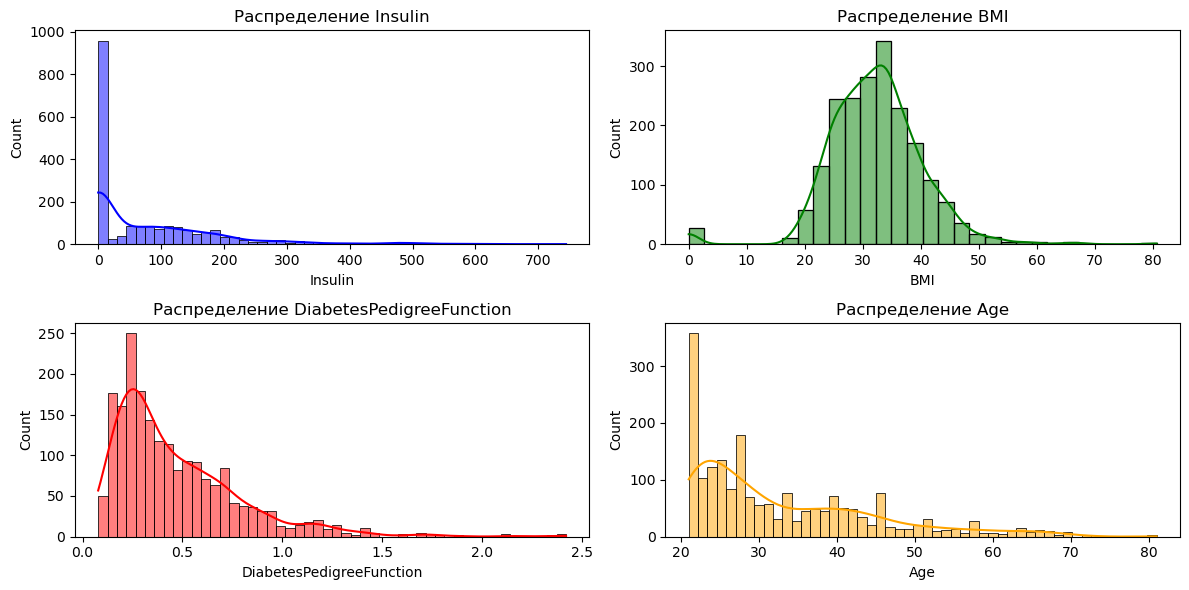

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Insulin'], bins=50, kde=True, color='blue')
plt.title('Распределение Insulin')

plt.subplot(2, 2, 2)
sns.histplot(df['BMI'], bins=30, kde=True, color='green')
plt.title('Распределение BMI')

plt.subplot(2, 2, 3)
sns.histplot(df['DiabetesPedigreeFunction'], bins=50, kde=True, color='red')
plt.title('Распределение DiabetesPedigreeFunction')

plt.subplot(2, 2, 4)
sns.histplot(df['Age'], bins=50, kde=True, color='orange')
plt.title('Распределение Age')

plt.tight_layout()
plt.show()


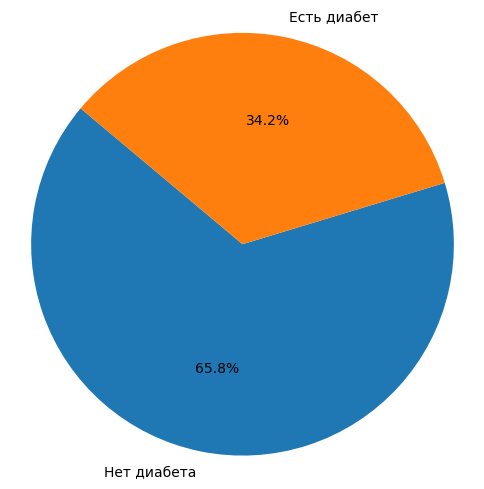

In [8]:
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Нет диабета', 'Есть диабет'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()


## Подготовка данных

In [16]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {len(X_train)}")
print(f"Размер X_test: {len(X_test)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")


Размер X_train: 1600
Размер X_test: 400
Размер y_train: 1600
Размер y_test: 400


## Обучение модели логистической регрессии

In [14]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.79
Precision: 0.80
Recall: 0.57
F1-Score: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.57      0.67       147

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.76       400
weighted avg       0.79      0.79      0.78       400



* Модель правильно классифировала 79% всех наблюдений.
* Среди предсказнных диабетчиков, 80% дейтсвительно им болели.
* Модель выявила только 57% настоящий диабетчиков, а остальных не заметила.
* F1-мера 0.67 говорит о том, что компромисс между точностью и полнотой в модели находится на среднем уровне

## Обучение MLP

### №1

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5_000, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.96
Precision: 0.96
Recall: 0.93
F1-Score: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       253
           1       0.96      0.93      0.94       147

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.96      0.96       400



### №2

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=3_000, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97
Precision: 0.95
Recall: 0.99
F1-Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       253
           1       0.95      0.99      0.97       147

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



* MLP для решения данной задачи подошёл намного лучше, чем лог.регрессия